In [ ]:
#ML Model to predict risk of Cardiovascular diseases

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Katie Chan CWS/" #location of data folder

In [ ]:
#from kaggle - https://www.kaggle.com/sulianova/cardiovascular-disease-dataset
data = os.path.join(path, "cardio_train.csv") #location of the data set in Drive

In [ ]:
df = pd.read_csv(data, sep=";") #sep = ";" is used to seperate the columns of the dataframe
df

#objectual
#age - in days
#gender - 1:Women, 2:Men
#height - cm
#weight - kgs

#medical tests
#ap_hi and ap_lo - Systolic and Diastolic Pressure
#cholesterol - 1:normal, 2:above normal, 3:well above normal
#glucose - 1:normal, 2:above normal, 3:well above normal

#subjective
#smoke - 0:notsmoke, 1:smoke
#alco - 0:does not drink, 1:drinks
#active - 0:not physically active, 1:active


#target variable
#cardio - 0:does not, 1:has disease

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
df["age"] = df["age"].apply(lambda num:num//365)
df #changes age to year wise

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
df.isnull().sum() #no empty values

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
#pick relevant features
df_new = df.drop(["id"], axis=1)
df_new

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
df_new.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

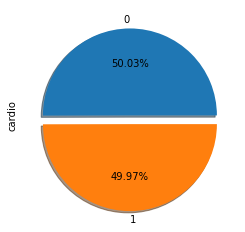

In [ ]:
df_new.cardio.value_counts().plot.pie(autopct="%.2f%%",explode=[0,0.1], shadow=True)
#the data set is about 50-50, 50 positive for cvd and 50 negative for cvd

In [ ]:
df_new.gender.value_counts()
#more women, than men in the dataset

1    45530
2    24470
Name: gender, dtype: int64

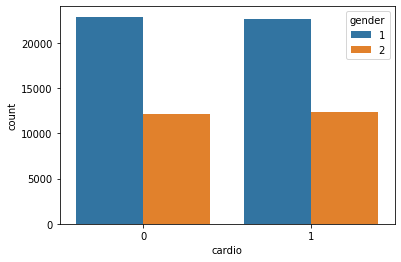

In [ ]:
sns.countplot(data= df_new, x="cardio",hue="gender")
#ratio of women:men who have and donot have cvd is roughly the same

In [ ]:
df_new.groupby(["gender","cardio"])["cardio"].count() #groupby categorical data are put on the rows, numeric data are placed on the columns

gender  cardio
1       0         22914
        1         22616
2       0         12107
        1         12363
Name: cardio, dtype: int64

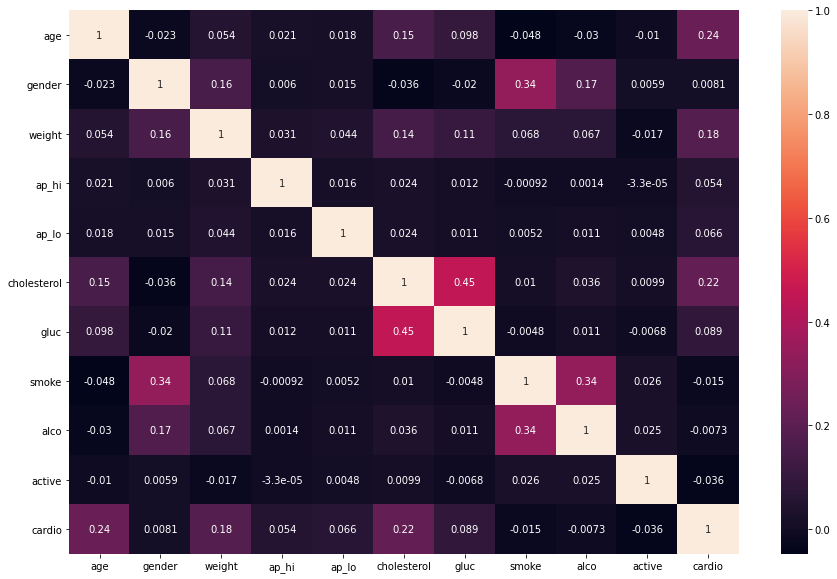

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df_new.corr(), annot=True) #helps visualize the +ve and -ve correlatioin between values

In [ ]:
# Scaling of Data
# Will use: Standard Scaler --> sets mean to 0 and standard deviations to 1

# Scaling of data: reduces biases due to large values of correlation
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(df_new.drop("cardio", axis = 1)) #scales, but just for preview

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_features = scaler.transform(df_new.drop(["cardio"], axis = 1)) #scales
scaled_features

array([[-0.41980002,  1.36405487, -0.84787326, ..., -0.31087913,
        -0.23838436,  0.49416711],
       [ 0.31910983, -0.73310834,  0.74983117, ..., -0.31087913,
        -0.23838436,  0.49416711],
       [-0.27201805, -0.73310834, -0.70894244, ..., -0.31087913,
        -0.23838436, -2.02360695],
       ...,
       [-0.12423608,  1.36405487,  2.13913938, ..., -0.31087913,
         4.19490608, -2.02360695],
       [ 1.20580165, -0.73310834, -0.15321916, ..., -0.31087913,
        -0.23838436, -2.02360695],
       [ 0.4668918 , -0.73310834, -0.15321916, ..., -0.31087913,
        -0.23838436,  0.49416711]])

In [ ]:
df_feat = pd.DataFrame(scaled_features, columns=df_new.columns[:-1]) 
df_feat
#sets array into a Data Frame
#names of the columns have been set as the same as previous df, except Outcome

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,-0.419800,1.364055,-0.847873,-0.122182,-0.088238,-0.539322,-0.395720,-0.310879,-0.238384,0.494167
1,0.319110,-0.733108,0.749831,0.072610,-0.035180,2.400793,-0.395720,-0.310879,-0.238384,0.494167
2,-0.272018,-0.733108,-0.708942,0.007679,-0.141297,2.400793,-0.395720,-0.310879,-0.238384,-2.023607
3,-0.715364,1.364055,0.541435,0.137541,0.017879,-0.539322,-0.395720,-0.310879,-0.238384,0.494167
4,-0.863146,-0.733108,-1.264666,-0.187113,-0.194356,-0.539322,-0.395720,-0.310879,-0.238384,-2.023607
...,...,...,...,...,...,...,...,...,...,...
69995,-0.124236,1.364055,0.124642,-0.057251,-0.088238,-0.539322,-0.395720,3.216684,-0.238384,0.494167
69996,1.205802,-0.733108,3.597913,0.072610,-0.035180,0.930735,1.351719,-0.310879,-0.238384,0.494167
69997,-0.124236,1.364055,2.139139,0.332333,-0.035180,2.400793,-0.395720,-0.310879,4.194906,-2.023607
69998,1.205802,-0.733108,-0.153219,0.040145,-0.088238,-0.539322,1.351719,-0.310879,-0.238384,-2.023607


In [ ]:
# spliting the data: x and y

x = df_feat
y = df_new["cardio"]

In [ ]:
#train and test spilt
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
#model selection: KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=45)

In [ ]:
#Model Training

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=45, p=2,
                     weights='uniform')

In [ ]:
#Model Predctions

In [ ]:
y_pred = knn.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
#Evaluation of model

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_test, y_pred)

0.6840952380952381

In [ ]:
#with height
#k=45: 0.665
#k=50: 0.6635714285714286
#k=100: 0.6603333333333333
#k=200: 0.6563809523809524
#k=2450: 0.6399523809523809 (5% of train dataset)
#k=3500: 0.6397142857142857

#without height
#k=45: 0.6840952380952381

In [ ]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,7452,3161
1,3473,6914


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69     10613
           1       0.69      0.67      0.68     10387

    accuracy                           0.68     21000
   macro avg       0.68      0.68      0.68     21000
weighted avg       0.68      0.68      0.68     21000

